<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
data = pd.read_csv('data_test.csv', sep="\t")
anomaly = pd.read_csv('anomaly.csv', sep="\t")
anomaly['anomaly'] = 1
anomaly = anomaly.drop_duplicates()
out = pd.merge(data, anomaly, how="left").fillna(0)
out['timestamp_minutes5'] = pd.to_datetime(out['timestamp_minutes5'], unit='s')
out['dupe'] = out.groupby('timestamp_minutes5')['anomaly'].transform(lambda x: len(x)>1)
out.set_index('timestamp_minutes5', inplace=True)

array([<AxesSubplot:ylabel='sum_count'>,
       <AxesSubplot:xlabel='timestamp_minutes5', ylabel='anomaly'>],
      dtype=object)

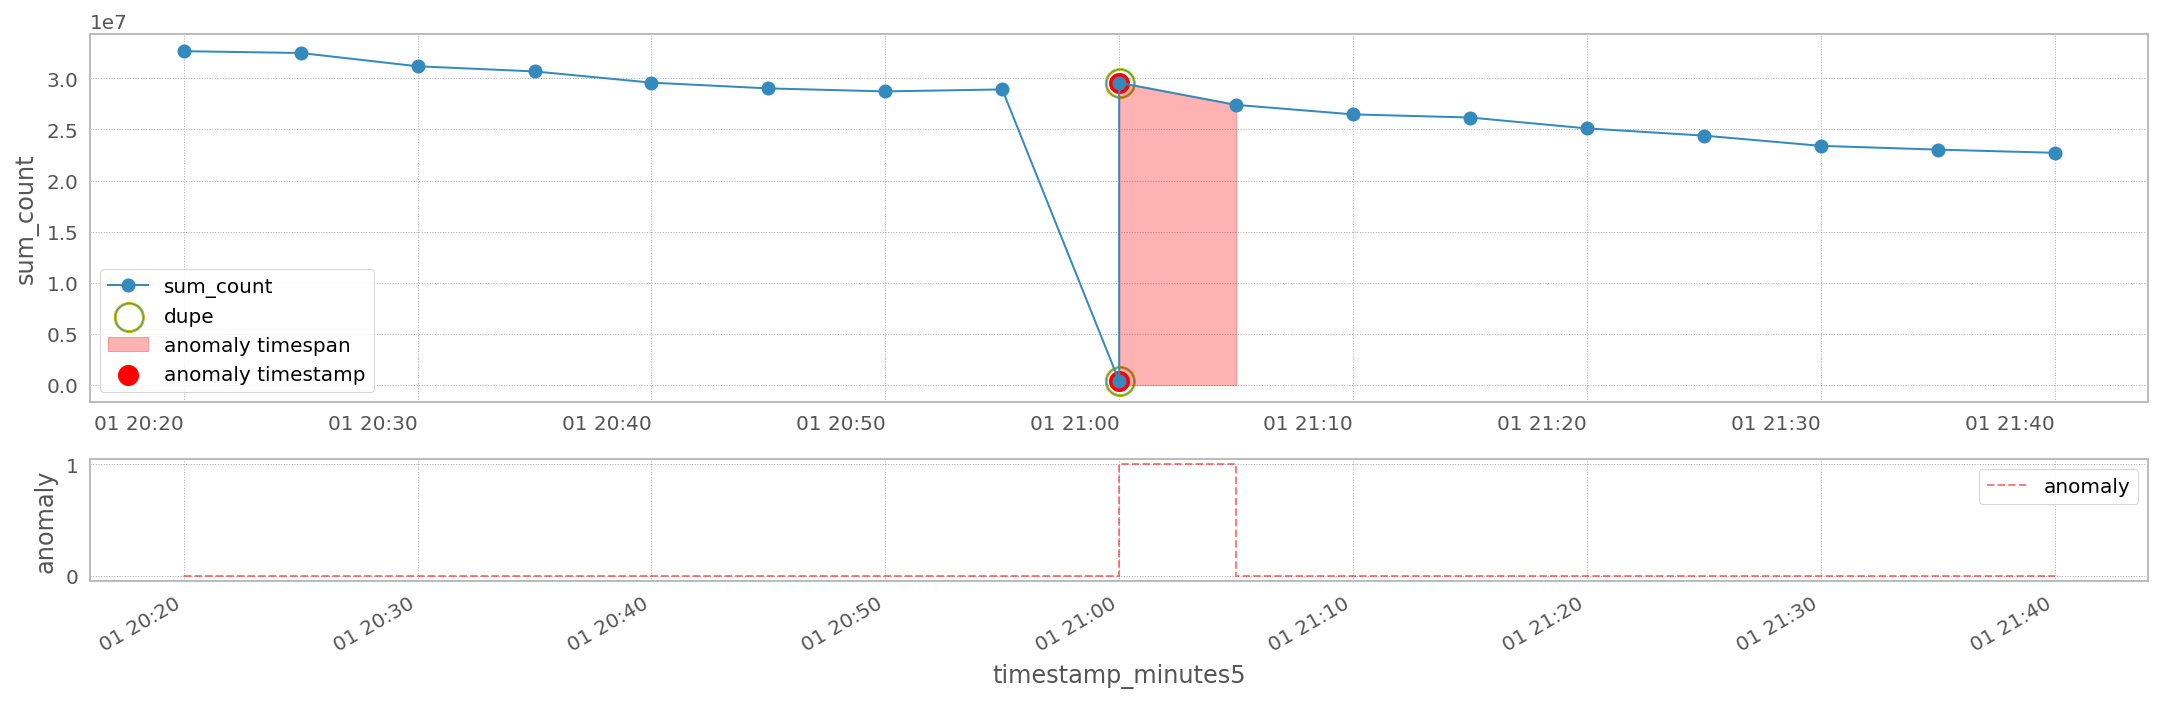

In [44]:
def plot_logs(df, *, start=None, end=None, log_count=False, overlay="dot_shadow", dupe=True):
    """
    Params:
        overlay: string - one in ["shadow", "dot", "dot_shadow"]
    """
    try:
        assert (
            isinstance(df, pd.DataFrame)
            and ("sum_count" in df.columns)
            and ("anomaly" in df.columns)
        )
    except:
        raise ValueError(
            'Check if supplied dataframe contains "sum_count" and "anomaly" columns'
        )
    if start is not None and end is not None:
        try:
            assert end > start
        except:
            raise ValueError('"end" param must be greater than "start"')
        df = df[start:end]
    if start is not None and end is None:
        df = df[start:]
    if start is None and end is not None:
        df = df[:end]
    _, ax = plt.subplots(2, 1, figsize=(15, 5), gridspec_kw={"height_ratios": [3, 1]})
    if len(df) > 100:
        st = None
    else:
        st = "o-"
    df["sum_count"].plot(label="sum_count", ax=ax[0], style=st, logy=log_count)
    ax[0].set_ylabel("sum_count")
    ax[1].set_ylabel("anomaly")
    ax[1].set_yticks([0, 1])
    df["anomaly"].plot(drawstyle="steps-post", ax=ax[1], style="r--", alpha=0.5)
    if dupe:   
        dupes = df[df['dupe']==True].reset_index().copy()
        dupes.plot(
            x="timestamp_minutes5",
            y="sum_count",
            kind="scatter",
            s=250,
            marker=u"$\u25EF$",
            edgecolors='y',
            ax=ax[0],
            label="dupe"
        )
        
    if overlay == "shadow":
        ax[0].fill_between(
            df.index,
            df["sum_count"],
            where=df["anomaly"].astype(bool)
            | df["anomaly"].shift().fillna(0).astype(bool),
            color="red",
            interpolate=False,
            alpha=0.3,
            label="anomaly timespan"
        )
        ax[0].set_xlabel(None)
        ax[0].legend()
        ax[1].legend()
        plt.tight_layout()
        return ax
    
    dots = df[df["anomaly"] == 1]["sum_count"].reset_index().copy()
    if overlay == "dot":
        dots.plot(
            x="timestamp_minutes5",
            y="sum_count",
            kind="scatter",
            color="red",
            s=100,
            ax=ax[0],
            label="anomaly timestamp"
        )
        ax[0].set_xlabel(None)
        ax[0].legend()
        ax[1].legend()
        plt.tight_layout()
        return ax
        
    if overlay == "dot_shadow":
        ax[0].fill_between(
            df.index,
            df["sum_count"],
            where=df["anomaly"].astype(bool)
            | df["anomaly"].shift().fillna(0).astype(bool),
            color="red",
            interpolate=False,
            alpha=0.3,
            label="anomaly timespan"
        )
        dots.plot(
            x="timestamp_minutes5",
            y="sum_count",
            kind="scatter",
            color="red",
            s=100,
            ax=ax[0],
            label="anomaly timestamp"
        ) 
        ax[0].set_xlabel(None)
        ax[0].legend()
        ax[1].legend()
        plt.tight_layout()
        return ax  


plot_logs(out, start=280, end=298)

In [7]:
dupes.plot(x="times")

,timestamp_minutes5,sum_count,anomaly,dupe
0,2019-06-01 21:00:00,374142.0,1.0,True
1,2019-06-01 21:00:00,29557885.0,1.0,True
2,2019-06-02 21:00:00,336952.0,1.0,True
3,2019-06-02 21:00:00,30502458.0,1.0,True
4,2019-06-03 21:00:00,347865.0,1.0,True
5,2019-06-03 21:00:00,30557480.0,1.0,True
6,2019-06-04 21:00:00,390732.0,1.0,True
7,2019-06-04 21:00:00,29592289.0,1.0,True
8,2019-06-05 21:00:00,374277.0,1.0,True
9,2019-06-05 21:00:00,29239434.0,1.0,True


In [ ]:
out['anomaly'][110:135]

In [ ]:
plot_logs(out, start=180, end=200, overlay="dot_shadow")

In [ ]:
df = out[190:200]
df